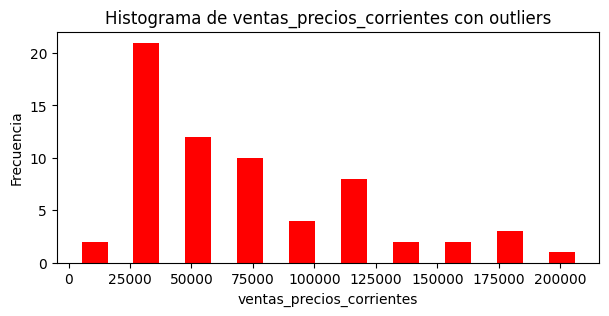

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#print('hello outliers')
df= pd.read_csv('ventas_totales_sinnulos.csv', index_col=0)
#print(df.head())

valores_nulos=df.isnull().sum()
#print(valores_nulos)

fig = plt.figure(figsize =(7, 3))
plt.hist(x=df["ventas_precios_corrientes"], color='red', rwidth=0.50)
plt.title('Histograma de ventas_precios_corrientes con outliers')
plt.xlabel('ventas_precios_corrientes')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
df

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06,9.189746e+06,1.330139e+07
62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,2.636778e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,5.776004e+06
63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,3.215055e+06,1.191048e+07


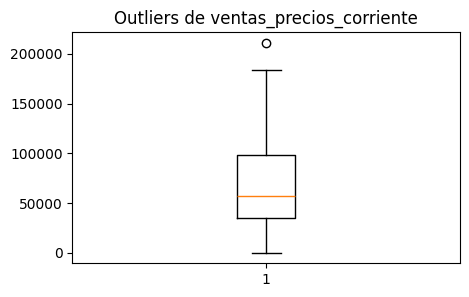

In [3]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(df["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corriente")
plt.show()

In [5]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["ventas_precios_corrientes"]
print(y)

0      27858.9
1      25994.2
2      27780.0
3      29134.3
4      27969.0
        ...   
60    154517.1
61    152202.6
62        16.5
63    177148.1
64    179639.2
Name: ventas_precios_corrientes, Length: 65, dtype: float64


In [6]:
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
print(percentile25)
print(percentile75)
iqr= percentile75 - percentile25
print(iqr)

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

35133.1
98007.6
62874.50000000001
Limite superior permitido 192319.35000000003
Limite inferior permitido -59178.650000000016


   indice_tiempo  ventas_precios_corrientes  ventas_precios_constantes  \
0     01/01/2017                    27858.9                    27477.3   
1     01/02/2017                    25994.2                    25223.4   
2     01/03/2017                    27780.0                    26334.3   
3     01/04/2017                    29134.3                    27045.9   
4     01/05/2017                    27969.0                    25631.9   
..           ...                        ...                        ...   
60    01/01/2022                   154517.1                    45463.4   
61    01/02/2022                   152202.6                    23802.1   
62    01/03/2022                       16.5                    24612.4   
63    01/04/2022                   177148.1                    24140.5   
64    01/05/2022                   179639.2                    23234.2   

    ventas_totales_canal_venta  salon_ventas  canales_on_line  \
0                 2.785887e+07  2.759173e+07  

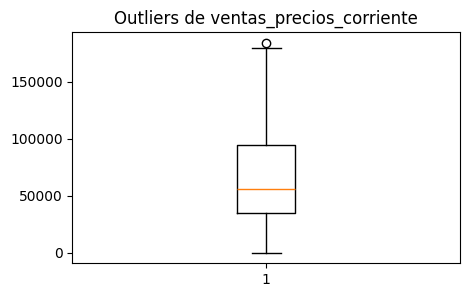

In [7]:
#Obtenemos datos limpios
data_clean_iqr= df[ (y< Limite_Superior_iqr) & (y > Limite_Inferior_iqr) ]
print(data_clean_iqr)

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corriente")
plt.show()

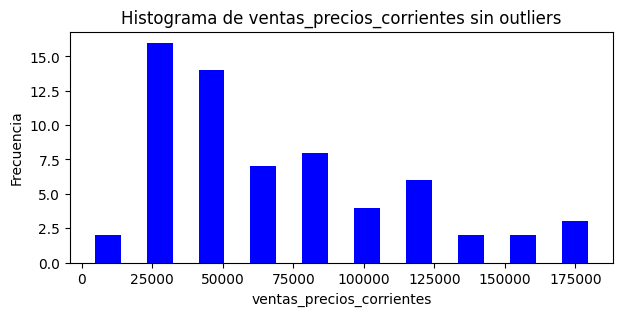

In [8]:
fig = plt.figure(figsize =(7, 3))
plt.hist(x=data_clean_iqr["ventas_precios_corrientes"], color='blue', rwidth=0.50)
plt.title('Histograma de ventas_precios_corrientes sin outliers')
plt.xlabel('ventas_precios_corrientes')
plt.ylabel('Frecuencia')
plt.show()